This is a notebook to test the use of salishsea_tools.visualisations.contour_thalweg().

It also provides examples about how to use this function.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np

from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools)

%matplotlib inline

Features to test

1. Contour levels
    * nowcast defined levels for temperature or salinity
    * N contour levels, autmatically determined by matplotlib
    * Array of contour levels determined by user
   
2. Depth array
    * 3D 
    * 1D
3. x coordinate
    * Distance along thalweg (default)
    * Thalweg index

# Prepare data

In [2]:
def results_dataset(results_dir, date, period, grid_type):
    datestr = date.strftime('%Y%m%d')
    subdir = date.strftime('%d%b%y').lower()
    fname = os.path.join(results_dir, subdir,
                        'SalishSea_{}_{}_{}_{}.nc'.format(period, datestr, datestr, grid_type))
    grid = nc.Dataset(fname)
    return grid

In [3]:
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')


grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy, lons, lats = tidetools.get_bathy_data(grid_B)

nowcast = '/results/SalishSea/nowcast/'
date = datetime.datetime(2016, 4, 4)
grid_T = results_dataset(nowcast, date, '1d', 'grid_T')

temp = grid_T.variables['votemper'][0,:,:,:]

sal = grid_T.variables['vosaline'][0,:,:,:]
sal_teos = teos_tools.psu_teos(sal)

# 1. Contour levels

## a. Use nowcast  defined contour levels 
These contour levels are hardcoded into the function.
### i. temperature

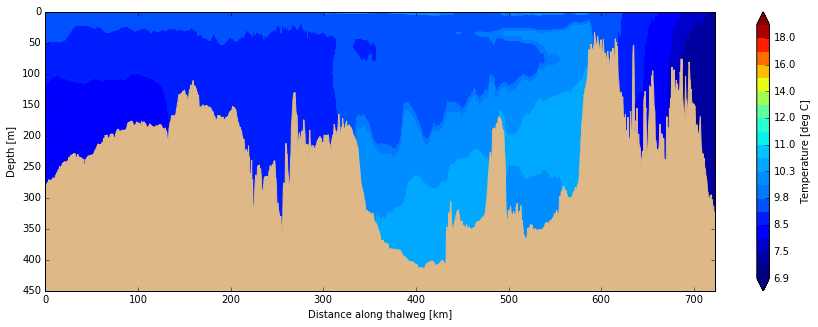

In [4]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, temp, bathy, lons, lats, mesh_mask, 'gdept', 'temperature', cmap='jet')
ax.set_ylim([450,0])
cbar.set_label('Temperature [deg C]')

### ii. salinity

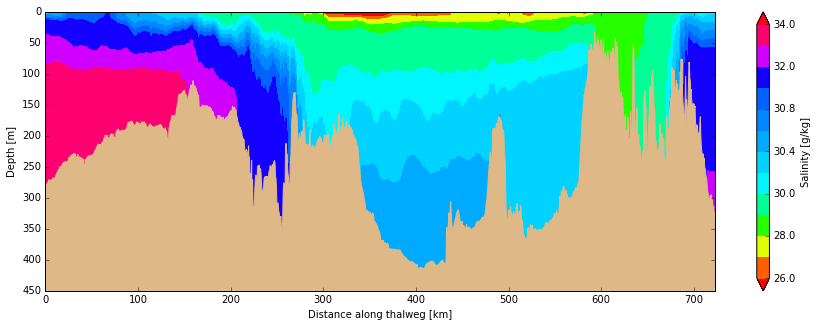

In [5]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, sal_teos, bathy, lons, lats, mesh_mask, 'gdept', 'salinity', cmap='hsv')
ax.set_ylim([450,0])
cbar.set_label('Salinity [g/kg]')

## b. N contour levels, automatically determined by matplotlib

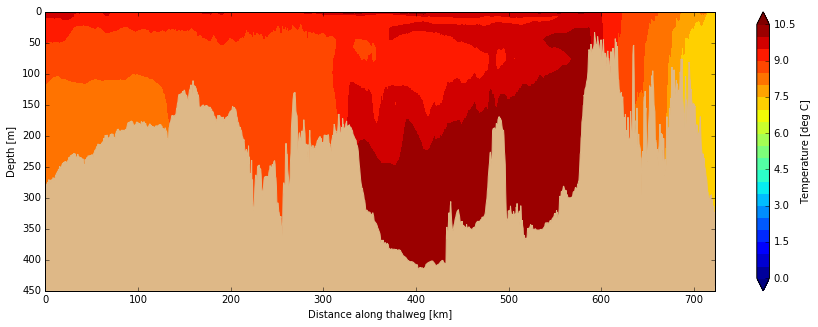

In [6]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
n=20
cbar = vis.contour_thalweg(ax, temp, bathy, lons, lats, mesh_mask, 'gdept', n, cmap='jet')
ax.set_ylim([450,0])
cbar.set_label('Temperature [deg C]')

### c.  Array of contour levels determined by user

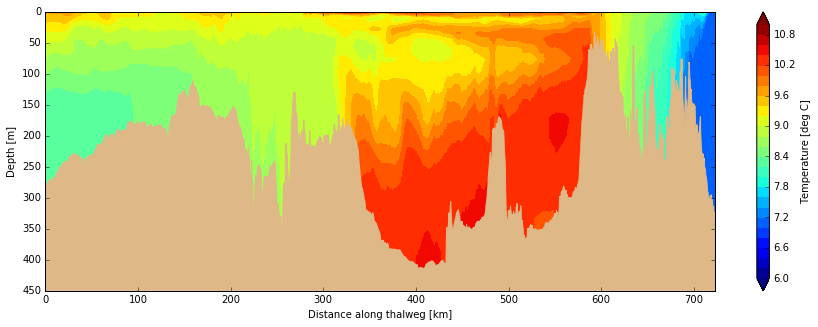

In [7]:
clevels = np.arange(6,11.2,.2)
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, temp, bathy, lons, lats, mesh_mask, 'gdept', clevels, cmap='jet')
ax.set_ylim([450,0])
cbar.set_label('Temperature [deg C]')

## 2. Depth array

### a. 3D depth array
This has been used in all the above plots. 
* For 3.4 mesh_mask, the 3D T-grid depths are chosen with mesh_mask_depth_var = 'gdept'
* For 3.6 mesh_mask, the 3D T-grid depths are chosen with mesh_mask_depth_var = 'gdept_0'

In the examples below, we use the 3.4 mesh_mask.

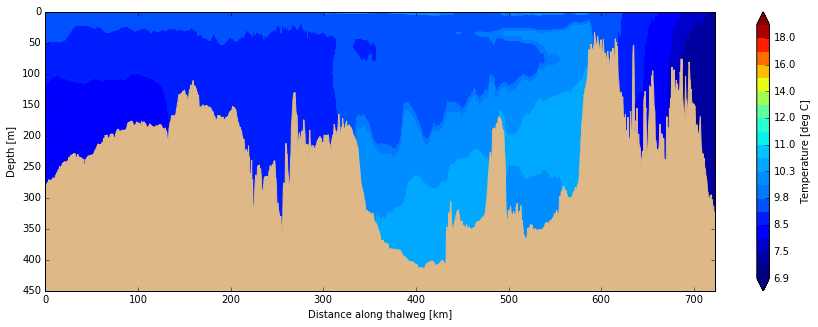

In [8]:
clevels = np.arange(6,11.2,.2)
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, temp, bathy, lons, lats, mesh_mask, 'gdept', 'temperature', cmap='jet')
ax.set_ylim([450,0])
cbar.set_label('Temperature [deg C]')

### b. 1D depth array
* For 3.4 mesh_mask, the 1D T-grid depths are chosen with mesh_mask_depth_var = 'gdept_0'
* For 3.6 mesh_mask, the 1D T-grid depths are chosen with mesh_mask_depth_var = 'gdept_1d'


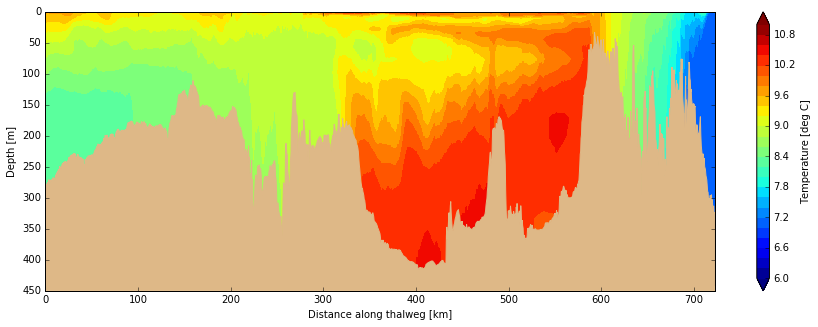

In [9]:
clevels = np.arange(6,11.2,.2)
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, temp, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='jet')
ax.set_ylim([450,0])
cbar.set_label('Temperature [deg C]')

There is no noticeable difference between the 1D and 3D but there would be if the _fill_in_bathy() wasn't applied.

**Note**: If you are plotting variables that do not live on T-levels, then use a different depth variable (like gdepw, gdepu, etc.)


## 3. x coordinate
### a. Thalweg distance
By default the routine plots vs distance along thalweg.

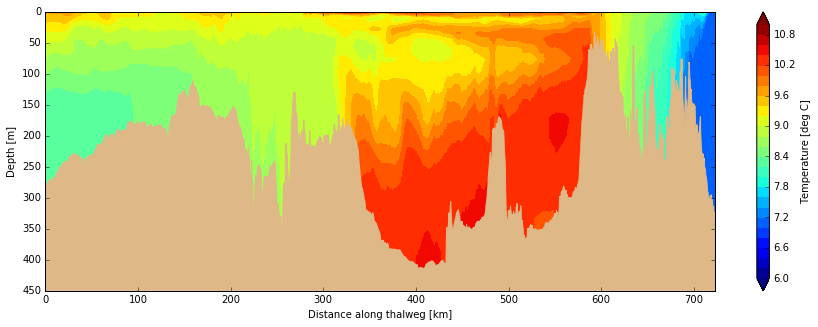

In [10]:
clevels = np.arange(6,11.2,.2)
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, temp, bathy, lons, lats, mesh_mask, 'gdept', clevels, cmap='jet')
ax.set_ylim([450,0])
cbar.set_label('Temperature [deg C]')

### b. Thalweg index
Set xcoord_distance = False

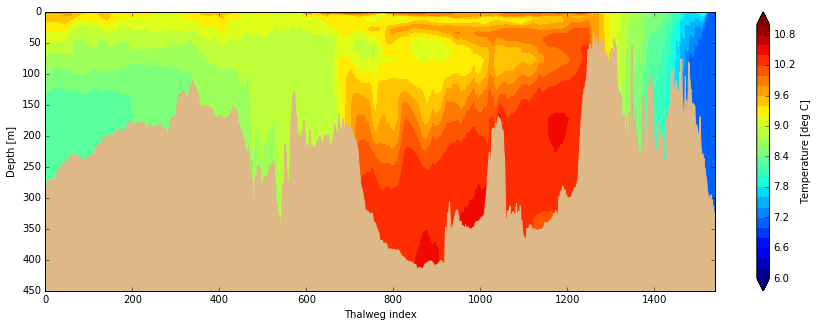

In [11]:
clevels = np.arange(6,11.2,.2)
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, temp, bathy, lons, lats, mesh_mask, 'gdept', clevels, cmap='jet', xcoord_distance=False)
ax.set_ylim([450,0])
cbar.set_label('Temperature [deg C]')

# Unresolved issues

At the moment, I get a warning when using this function with masked arrays. It stems from the _fill_in_bathy() routine because _fill_in_bathy() unmasks a previously masked element. For now, the solution is to not use masked arrays because _add_bathy_patch() takes care of coloring the land. Or, you can use masked arrays and deal with the warning. In either case, setting clevels=N is undesireable because the land points take on zero values, so the automatically defined contours may be outside of realistic data range.  

/home/nsoontie/anaconda3/lib/python3.4/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


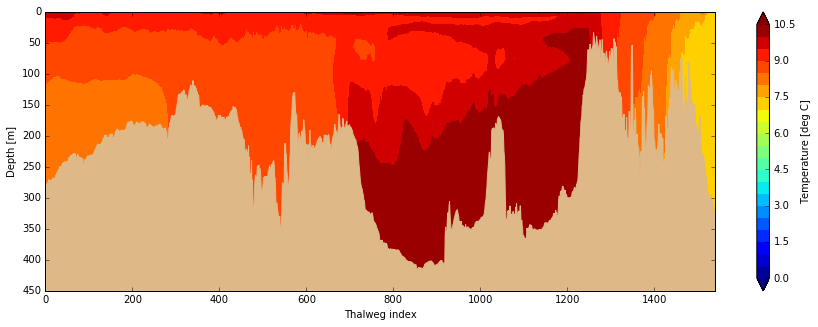

In [12]:
tmask = mesh_mask.variables['tmask'][0,:,:,:]
temp_mask = np.ma.array(temp, mask=1-tmask)

clevels = np.arange(6,11.2,.2)
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, temp_mask, bathy, lons, lats, mesh_mask, 'gdept', 20, cmap='jet', 
                           xcoord_distance=False)
ax.set_ylim([450,0])
cbar.set_label('Temperature [deg C]')